In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
Credit_card_data= pd.read_csv("C:/Users/SUBHADEEP/Desktop/creditcard.csv")

In [3]:
Credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
Credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
Credit_card_data.shape

(284807, 31)

In [6]:
Credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
Credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
duplicate_rows = Credit_card_data[Credit_card_data.duplicated()]
duplicate_rows.shape

(1081, 31)

In [9]:
Credit_card_data = Credit_card_data.drop_duplicates()
Credit_card_data.shape

(283726, 31)

In [10]:
Credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [11]:
Credit_card_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [12]:
print('Legit Transaction:',round(Credit_card_data['Class'].value_counts()[0]/len(Credit_card_data)*100,2),'%')
print('Fraud Transaction:',round(Credit_card_data['Class'].value_counts()[1]/len(Credit_card_data)*100,2),'%')

Legit Transaction: 99.83 %
Fraud Transaction: 0.17 %


Text(0.5, 1.0, 'Class Distributions\n (0:Legit, 1:Fraud)')

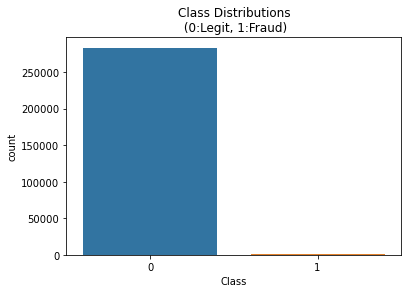

In [13]:
sns.countplot('Class',data=Credit_card_data)
plt.title('Class Distributions\n (0:Legit, 1:Fraud)')

In [14]:
std_scaler = StandardScaler()
rob_scaler= RobustScaler()

Credit_card_data['Scaled Amount'] = rob_scaler.fit_transform(Credit_card_data['Amount'].values.reshape(-1,1))
Credit_card_data.drop(['Amount'],axis=1, inplace=True)


In [15]:
Scaled_Amount= Credit_card_data['Scaled Amount']
Credit_card_data.drop(['Scaled Amount'],axis=1,inplace=True)
Credit_card_data.insert(0,"Scaled Amount",Scaled_Amount)
Credit_card_data.head()

,Scaled Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [16]:
X= Credit_card_data.drop(['Time','Class'],axis=1)
Y=Credit_card_data['Class']

In [17]:
Credit_card_data = Credit_card_data.sample(frac=1)
Fraud_data = Credit_card_data.loc[Credit_card_data['Class']==1]
Legit_data = Credit_card_data.loc[Credit_card_data['Class']==0][:473]

Normal_data = pd.concat([Fraud_data, Legit_data])
New_data = Normal_data.sample(frac=1,random_state=2)

New_data.head()

,Scaled Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
182749,-0.292032,125532.0,2.018978,-0.981888,-1.607440,-0.570586,0.371100,1.483999,-0.803163,0.475355,...,-0.828387,-0.117819,0.454730,0.123886,-0.758215,0.040156,0.021710,0.053237,-0.079384,0
133005,-0.024475,80209.0,-2.881121,1.970811,1.886022,-0.087077,-1.300333,-0.302015,-0.007533,0.111147,...,0.336327,-0.105060,0.034455,-0.199269,0.741700,0.205131,0.175113,-1.217805,-0.451662,0
18472,-0.296482,29531.0,-1.060676,2.608579,-2.971679,4.360089,3.738853,-2.728395,1.987616,-0.357345,...,-0.089062,-0.063168,-0.207385,-0.183261,-0.103679,0.896178,0.407387,-0.130918,0.192177,1
204503,0.866083,135314.0,-3.158990,1.765452,-3.390168,0.987410,-1.509930,-1.280952,-2.719557,0.718325,...,-0.022590,1.120533,1.605085,-0.618637,-0.251283,-0.240528,-0.004327,-0.235477,0.018129,1
254540,1.561813,156779.0,1.887628,-0.395695,-2.330865,0.532687,0.587076,-0.844273,0.703926,-0.451872,...,0.047208,0.542633,1.512485,-0.400575,0.614778,0.737345,0.902158,-0.126054,-0.061346,0


Distribution of the classes in the sub sample data
0    0.5
1    0.5
Name: Class, dtype: float64


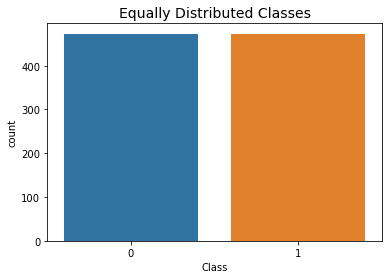

In [18]:
print('Distribution of the classes in the sub sample data')
print(New_data['Class'].value_counts()/len(New_data))

sns.countplot('Class', data=New_data)
plt.title('Equally Distributed Classes',fontsize=14)
plt.show()

In [19]:
correlation = Credit_card_data.corr()

<AxesSubplot:>

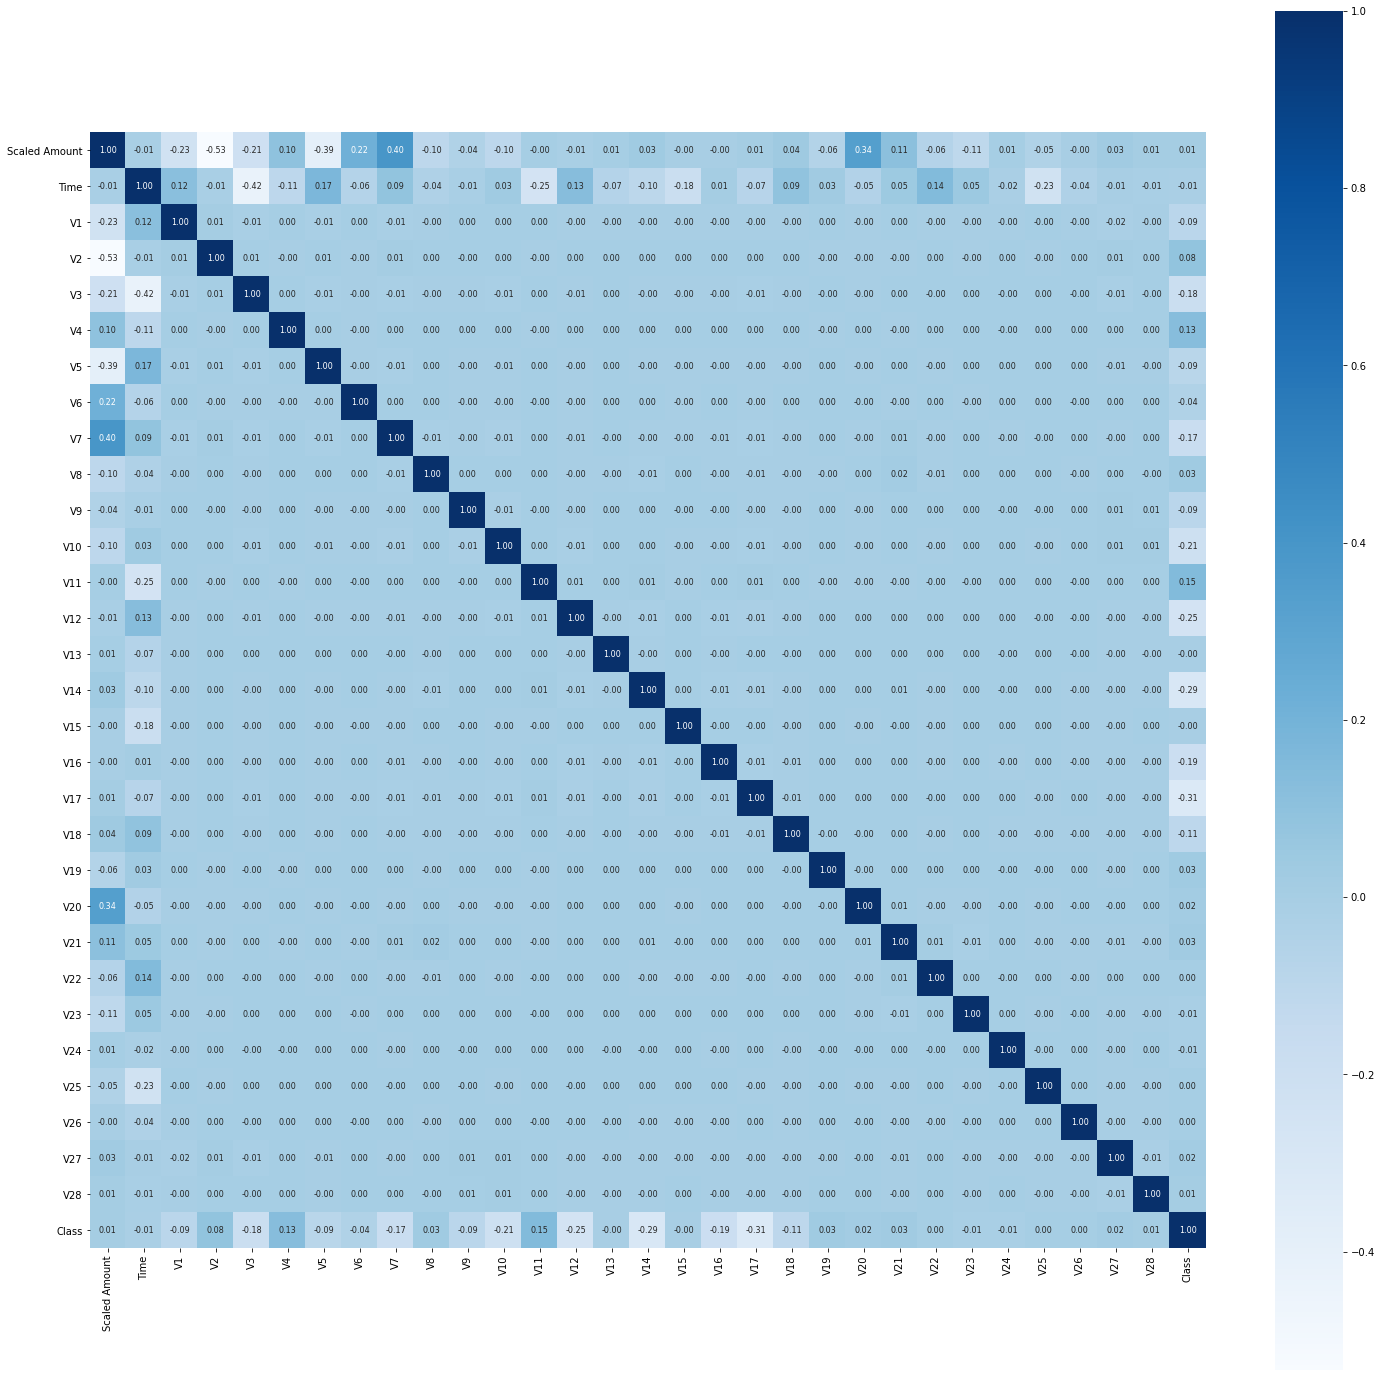

In [20]:
plt.subplots(figsize=(25,25))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap="Blues")

<AxesSubplot:>

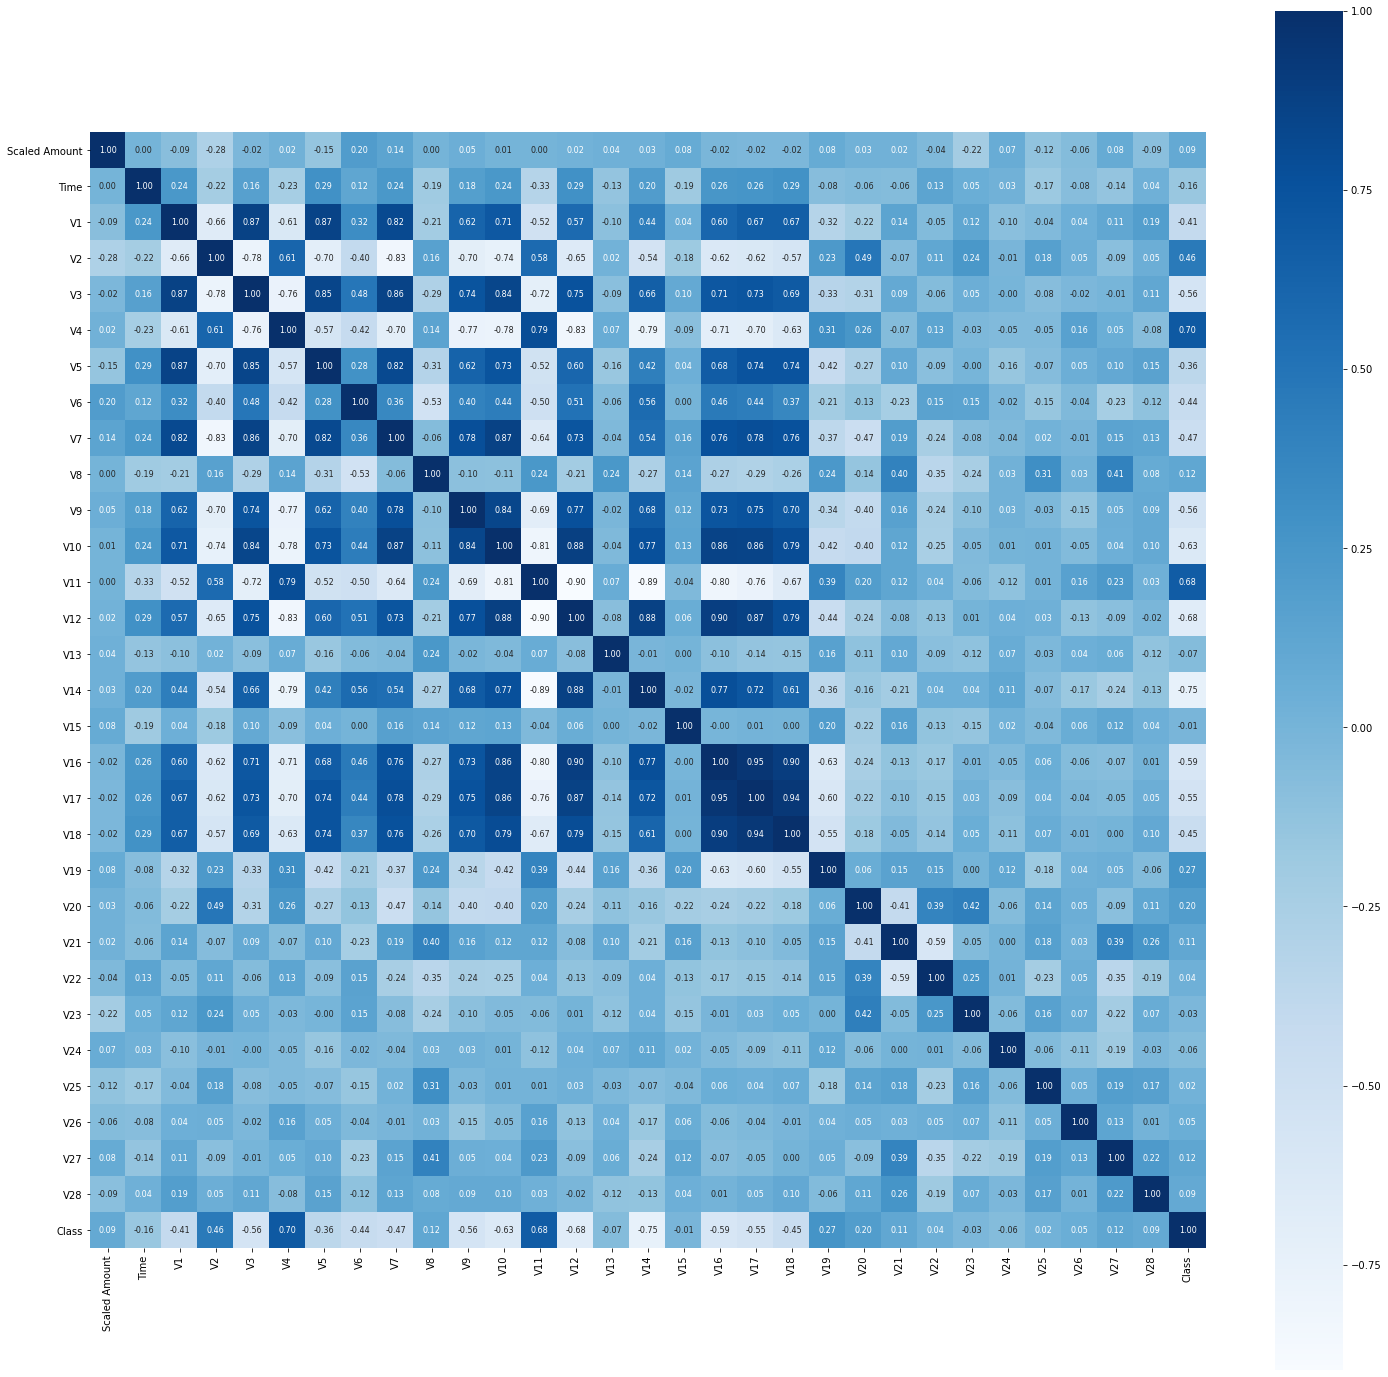

In [21]:
plt.subplots(figsize=(25,25))
sns.heatmap(New_data.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8},cmap="Blues")

In [22]:
X =New_data.drop(['Time','Class'],axis=1)
Y = New_data['Class']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
X_train.shape

(756, 29)

In [24]:
X_test.shape

(190, 29)

In [25]:
Model=LogisticRegression()
Model.fit(X_train, Y_train)

LogisticRegression()

In [26]:
Y_Pred= Model.predict(X_test)
print('Accuracy: ',(round(accuracy_score(Y_test,Y_Pred)*100,2)),'%')

Accuracy:  91.05 %


[Text(0, 0.5, ''), Text(0, 1.5, '')]

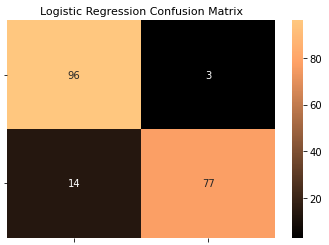

In [27]:
Logistic_reg_CF= confusion_matrix(Y_test,Y_Pred)
fig,ax=plt.subplots(figsize=(6,4))
sns.heatmap(Logistic_reg_CF,annot=True,cmap=plt.cm.copper)
ax.set_title("Logistic Regression Confusion Matrix", fontsize=11)
ax.set_xticklabels(['',''],fontsize=11,rotation=90)
ax.set_yticklabels(['',''],fontsize=11,rotation=360)

In [28]:
print(classification_report(Y_test,Y_Pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        99
           1       0.96      0.85      0.90        91

    accuracy                           0.91       190
   macro avg       0.92      0.91      0.91       190
weighted avg       0.92      0.91      0.91       190



In [29]:
Test_case_values=[239.93,-2.303349560,1.75924746,-0.359744743,2.330243051,-0.021628328,-0.075787571,0.562319782,-0.399146578,-0.238253368,-1.525411627,2.032932629]
Test_case_data=pd.DataFrame(Test_case_values)
Test_case= Test_case_data.T
Test_case_pred=Model.predict(Test_case)
if(Test_case_pred==0):
    print("Legit Transaction")
else:
    print("Fraud Transaction")

ValueError: X has 12 features per sample; expecting 29